# **Task 3**

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [2]:
#write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.shape

(891, 12)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Write a function which accepts a dataframe, preprocesses the data and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

<Axes: >

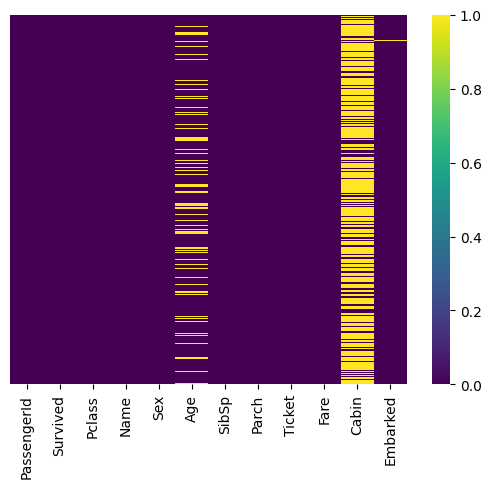

In [6]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis') #visualizing null values using heatmap
# The cmap parameter in Seaborn's heatmap function stands for "colormap," and it determines the color palette used to represent the data in the heatmap. In your code, cmap='viridis' specifies the use of the "viridis" colormap.

#SEE AGE AND CABIN IN ABOVE TABLE AS WELL AS THIS HEATMAP

In [7]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.drop("Cabin",axis=1,inplace=True)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
titanic_data.dropna(inplace=True) 

<Axes: >

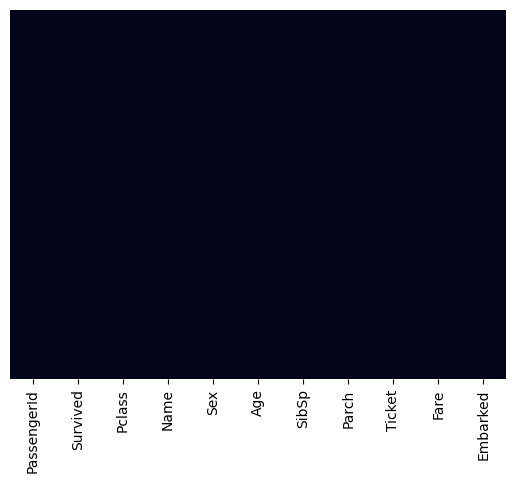

In [10]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [11]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [13]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True) #dropping female as if its 1 in male then the person is not a female and vice versa
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
#Embarked is also in strings, and dropping the first column again
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
#Pclass is also in strings, and dropping the first column again
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True) #if the value in column 2nd class and 3rd class is 0, then we know it definitely is 1st class
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl],axis=1) #concating the new columns with dataset
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [17]:
# As now the old columns(like Sez,Pclass,Embarked) with old values are useless we can just drop them, and also we drop some other useless columns like Name
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True) 

In [18]:
titanic_data.drop('Pclass',axis=1,inplace=True) #we forgot to put Pclass in list above while dropping

In [19]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [20]:
#write code here
y =titanic_data['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [21]:
#write code here
X = titanic_data.drop(columns=['Survived'])
X.columns = X.columns.astype(str) 

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#write code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [24]:
#write code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
#creating decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [26]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [27]:
dt_model.score(X_train,y_train)

0.9919678714859438

In [28]:
dt_model.score(X_test,y_test)

0.7616822429906542

In [29]:
dt_model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

The predict_proba() method in scikit-learn is used for obtaining the predicted class probabilities for classification tasks. It's particularly useful when you want to not only predict the most likely class for each sample but also get the confidence scores or probabilities associated with those predictions.

In [30]:
dt_model.predict_proba(X_test)

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. ,

In [31]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [32]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,new_y)

0.7616822429906542

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

Ensemble methods often lead to improved predictive performance compared to single models. By combining the predictions of multiple models, ensembles can reduce bias and variance, resulting in more accurate and robust predictions.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [35]:
#write code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred1 = rf.predict(X_test)

In [37]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred1)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.7627164502164503

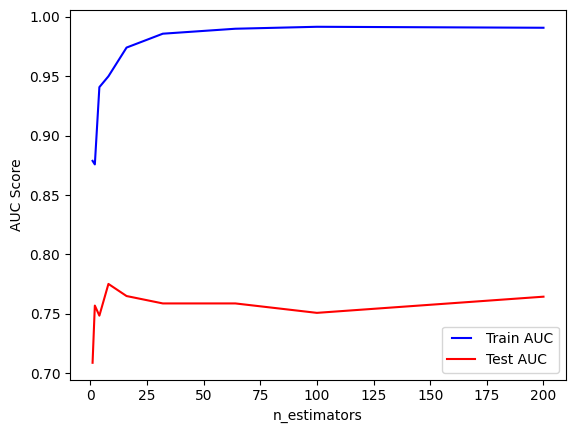

In [38]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, = plt.plot(n_estimators,test_results,"r",label="Test AUC")
plt.legend(handler_map = {line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()



### 2. Boosting

In [39]:
#write code here
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [40]:
LoanData = pd.read_csv('income.csv')
LoanData.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [41]:
#separating predictors and response
X = LoanData.iloc[:,0:6]  #independent columns
y = LoanData.iloc[:,6]    #target columns

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<b>Model Training and evaluation</b>

In [43]:
#Here we create classifier object
AdaModel = AdaBoostClassifier(n_estimators=100,learning_rate=1)

Important Parameters

n_estimators : Number of weak learners to train iteratively

learning_rate : It contributes to the weights of weak learners. it uses 1 as a default value

In [44]:
#Train Adaboost Classifier
model = AdaModel.fit(X_train,y_train)

#Predict the response for the test dataset
y_pred = model.predict(X_test)

In [46]:
#Model Accuracy, how often is the classifier correct
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8434844917596479


### 3. Pruning Techniques

In [45]:
#write code here

### 4. Naive Bayes Classifier Algorithm

In [1]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [3]:
df['spam'] = df["Category"].apply(lambda x:1 if x =='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.25)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [8]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9827709978463748

In [9]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [10]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [11]:
clf.score(X_test,y_test)

0.9827709978463748

In [13]:
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [14]:
clf.predict(emails)
# we see in output 0,1 which means 1st email is not a spam whereas 2nd one is a spam email

array([0, 1], dtype=int64)

## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.
